<a href="https://colab.research.google.com/github/ShreyaNavya/LGMVIP--DataScience/blob/main/T1(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')


In [ ]:
df=pd.read_csv("iris.csv")
#print(df)

In [ ]:
print(df.shape)

(150, 6)


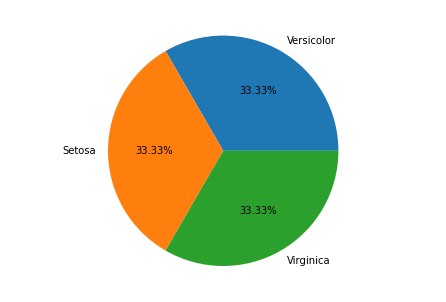

In [ ]:
graph = plt.figure()
ax = graph.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

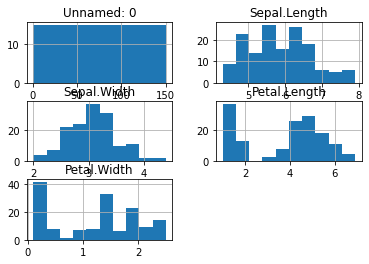

In [ ]:
df.hist()
plt.show()

In [ ]:
#Correlation 
corr_mat = df.corr()
print(corr_mat)

              Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Unnamed: 0      1.000000      0.716676    -0.402301      0.882637     0.900027
Sepal.Length    0.716676      1.000000    -0.117570      0.871754     0.817941
Sepal.Width    -0.402301     -0.117570     1.000000     -0.428440    -0.366126
Petal.Length    0.882637      0.871754    -0.428440      1.000000     0.962865
Petal.Width     0.900027      0.817941    -0.366126      0.962865     1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train, test = train_test_split(df, test_size = 0.25)
print("Train: ",train.shape)
print("Test: ",test.shape)

Train:  (112, 6)
Test:  (38, 6)


In [ ]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
test_y = test.Species

In [ ]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 1.0


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print("Classification report:\n",classification_report(test_y,prediction))

Confusion matrix: 
 [[14  0  0]
 [ 0 11  0]
 [ 0  0 13]]
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
#Using SVM.
from sklearn.svm import SVC
model_a = SVC()
model_a.fit(train_X,train_y)
pred_y = model_a.predict(test_X)
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


In [ ]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_b = KNeighborsClassifier(n_neighbors=5)
model_b.fit(train_X,train_y)
y_pred = model_b.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred))

Accuracy Score: 0.9736842105263158


In [ ]:
#Naive Bayes.
from sklearn.naive_bayes import GaussianNB
model_c = GaussianNB()
model_c.fit(train_X,train_y)
y_pred = model_c.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred))

Accuracy Score: 1.0


In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier(criterion='entropy',random_state=7)
model_d.fit(train_X,train_y)
y_pred = model_d.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred))

Accuracy Score: 0.9473684210526315


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree
